# One-Dimensional Cases

*You are seeing the
notebook output generated by
[Literate.jl](https://github.com/fredrikekre/Literate.jl) from the
[Julia source file](https://github.com/JuliaOptimalTransport/OptimalTransport.jl/blob/master/examples/OneDimension/script.jl).
The rendered HTML can be viewed [in the docs](https://juliaoptimaltransport.github.io/OptimalTransport.jl/dev/examples/OneDimension/).*

The 1D case in Optimal Transport is a special case where one can
easily obtain closed form solutions efficiently
when the cost function is convex. In this situation,
one does no need to use Linear Programming solvers
to obtain the exact solution to the problem.

## Packages

We load the following packages into our environment:

In [1]:
using OptimalTransport
using Distances
using Distributions
using StatsPlots

using LinearAlgebra
using Random

Random.seed!(1234);

## Continuous Distribution

In the 1D case, when the source measure $\mu$ is continuous and the cost function
has the form $c(x, y) = h(|x - y|)$ where $h$ is a convex function,
the optimal transport plan is the Monge map
$$
T = F_\nu^{-1} \circ F_\mu
$$
where $F_\mu$ is the cumulative distribution function of `μ` and $F_\nu^{-1}$ is the
quantile function of `ν`.
In this setting, the optimal transport cost can be computed as
$$
\int_0^1 c(F_\mu^{-1}(x), F_\nu^{-1}(x)) \mathrm{d}x
$$
where $F_\mu^{-1}$ and $F_\nu^{-1}$ are the quantile functions of `μ` and `ν`,
respectively.

We start by defining the distributions.

In [2]:
μ = Normal(0, 1)

N = 10
ν = Poisson(N);

Nest, we define a cost function.

In [3]:
c(x, y) = (abs(x - y))^2 # could have used `sqeuclidean` from `Distances.jl`

T = ot_plan(c, μ, ν);

`T` is the Monge Map. Let's visualize it.

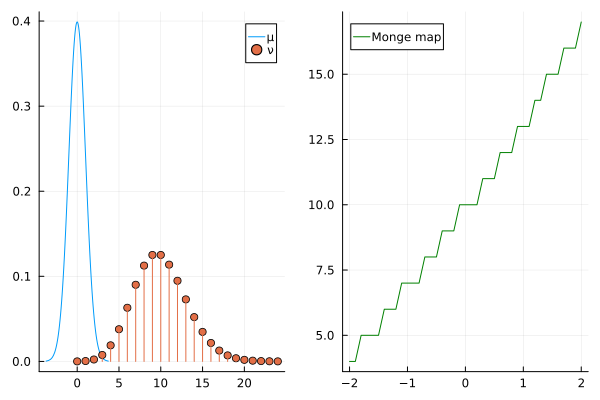

In [4]:
p1 = plot(μ; label='μ')
p1 = plot!(ν; marker=:circle, label='ν')
p2 = plot(-2:0.1:2, T(-2:0.1:2); label="Monge map", color=:green, legend=:topleft)
plot(p1, p2)

The optimal transport cost can be computed with

In [5]:
ot_cost(c, μ, ν)

104.72027014853334

If instead you want the 2-Wasserstein distance (which is the square root
of the optimal transport with the Square Euclidean distatce, then use

In [6]:
wasserstein(μ, ν; p=2)

10.233292243874077

## Finite Discrete Distributions

If the source and target measures are 1D finite discrete distributions
(sometimes referred as empirical distributions, or as sample distributions),
and if the cost function is convex, then the optimal
transport plan can be written as a sorting algorithm,
where the utmost left probability mass of the source is transported
to the closest probability mass of the target, until everything is transported.

Define your measures as DiscreteNonParametric, which is a type in Distributions.jl.
Also, let's assume both point masses with equal weights and let's
use the `sqeuclidean` function instead of creating our own cost function.

In [7]:
M = 15
μ = DiscreteNonParametric(1.5rand(M), fill(1 / M, M))

N = 10
ν = DiscreteNonParametric(1.5rand(N) .+ 2, fill(1 / N, N))

γ = ot_plan(sqeuclidean, μ, ν);

This time γ is a sparse matrix containing the transport plan. Let's visualize the results.
We create a function `curve` just as a helper to draw the transport plan.

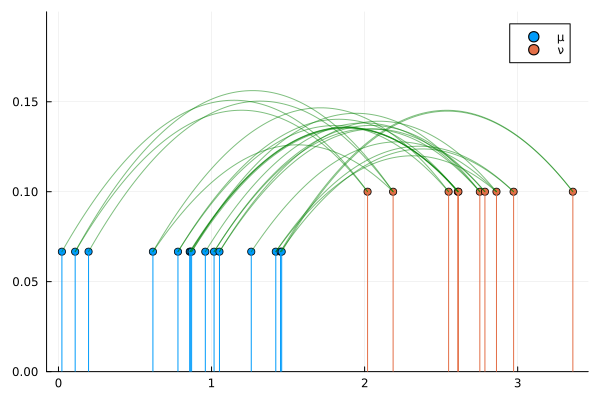

In [8]:
function curve(x1, x2, y1, y2)
    a = min(y1, y2)
    b = (y1 - y2 + a * (x1^2 - x2^2)) / (x1 - x2)
    c = y1 + a * x1^2 - b * x1
    f(x) = -a * x^2 + b * x + c
    return f
end

p = plot(μ; marker=:circle, label='μ')
p = plot!(ν; marker=:circle, label='ν', ylims=(0, 0.2))
for i in 1:M, j in 1:N
    if γ[i, j] > 0
        transport = curve(μ.support[i], ν.support[j], 1 / M, 1 / N)
        x = range(μ.support[i], ν.support[j]; length=100)
        p = plot!(x, transport.(x); color=:green, label=nothing, alpha=0.5)
    end
end
p

Again, the optimal transport cost can be calculated with

In [9]:
ot_cost(sqeuclidean, μ, ν)

3.2925430197981305

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*